# Fine Tuning
We are almost done

In [31]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_feat, final_df = make_officer_df.make_df(t1, t2)


Index(['Active - Firearm', 'Active - Non-Lethal Weapon', 'Active - Other',
       'Active - Physical Force', 'Passive - Firearm',
       'Passive - Non-Lethal Weapon', 'Passive - Other',
       'Passive - Physical Force'],
      dtype='object', name='force_resistance_feat')


In [42]:
final_df["Other/Unknown"].describe()

count    7174.000000
mean        1.468358
std         1.477482
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: Other/Unknown, dtype: float64

In [43]:
cont_feat = ["birth_year", "start_date_timestamp"]
cont_feat.extend(additional_cont_feat)
cat_feat = ["gender", "race"]

desired_targets = ['target_use_of_force', 'target_drug', 'target_racial',
                   'target_sustained', 'target_nonviolent']
target_col = "any_known_complaint"
feat_engineering_helpers.make_target_col(final_df, desired_targets, target_col)

best  RandomForest  metrics:
{'precision': 0.2595573440643863, 'recall': 0.6142857142857143, 'f1-score': 0.36492220650636487, 'support': 210}


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.146341,1.000000,0.500000
0.00001,0.146341,1.000000,0.500000
0.01000,0.146341,1.000000,0.500000
0.05000,0.146341,1.000000,0.500000
0.10000,0.146341,1.000000,0.500000
0.20000,0.146546,1.000000,0.500816
0.30000,0.158223,0.966667,0.542517
0.40000,0.203661,0.847619,0.639728
0.50000,0.259557,0.614286,0.656939


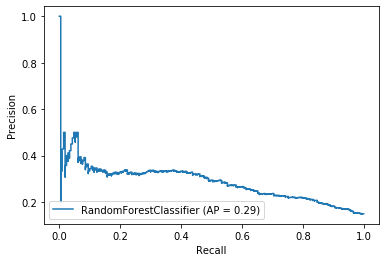

In [47]:
rf, rf_feature_importances =  run_model.single_model(final_df, "RandomForest", 
                                                     target_col, cont_feat, cat_feat, "balanced_accuracy")

In [48]:
rf_feature_importances.sort_values(by = 0, ascending=False)

,0
Pcnt Complaints Against MALE,0.104303
Pcnt Complaints Against FEMALE,0.097906
Other/Unknown,0.084661
Passive - Other,0.082907
start_date_timestamp,0.082427
birth_year,0.079473
trr_total,0.077989
Active - Physical Force,0.061310
average_salary,0.051217
Passive - Physical Force,0.035716


In [49]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [40]:
rf2, rf_feature_importances2 =  run_model.single_model(final_df, "RandomForest", 
                                                     target_col, cont_feat, cat_feat, "balanced_accuracy")

KeyboardInterrupt: 

In [ ]:
rf_feature_importances2